# Optimal mesh size for bimodal ridesharing

Equating the number of requests with the service capacity yields:

$$ \ell^2 \, I(\ell) = \frac{\mu k}{\nu E} =: \frac{\Psi}{\Theta}$$

$$
\ell: \text{mesh size}\\
I(\ell) = \int_{\zeta \ell}^\infty p_d(x) \, dx\\
\mu: \text{tram frequency}; \; k: \text{tram capacity};\; \nu: \text{request frequency}; \; E: \text{population density}
$$

In [10]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from scipy.stats import norm

#from matplotlib import rc
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)


In [11]:
# line service fraction
def I(l, mean, sigma, alpha):
    return 0.5*(1-special.erf((alpha*l-mean)/(sigma*np.sqrt(2))))

# dI/dl
def IPrime(l, mean, sigma, alpha):
    dist = norm(loc = mean, scale = sigma)
    return -alpha*dist.pdf(alpha*l)

# Parameters

In [21]:
# set parameters
alpha = 1; # multiple of cell length at which tram becomes more efficient
    # this depends on relative velocities and detours

###
# area parameters
###
davg = 1.0; # average requested trip length / km
sigma = 0.1 * davg; #TODO: What is a reasonnable assumption here?

# trip length distribution; we take a Gaussian for simplicity here
Pd = norm(loc = davg, scale = sigma)

E = 1000; # population density in # / km²
#Ed = E/(davg*davg);
nu = 2; # requests per inhabitant per day
Theta = E*nu; # shorthand notation

# ---
###
# provider parameters
###
mu = 100; # line frequency, e.g., 30 / day
k = 100; # line capacity, e.g., 100 people
Psi = mu*k; # shorthand notation

lrange = np.arange(0.0*davg, 1.5*davg, 0.01)
lrangeNorm = lrange / davg;
#print(lrangeNorm)

# Qualitative behavior of $I \ell^2$

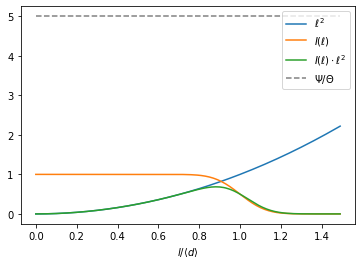

In [22]:
plt.plot(lrangeNorm, lrange**2, label=r'$\ell^2$')
plt.plot(lrangeNorm, I(lrange, davg, sigma, alpha), label=r'$I(\ell)$')
plt.plot(lrangeNorm, lrange**2*I(lrange, davg, sigma, alpha), label=r'$I(\ell)\cdot \ell^2$')

plt.hlines(Psi/Theta, lrangeNorm[0], lrangeNorm[-1], ls="--", color="gray", label=r"$\Psi/\Theta$")

plt.xlabel(r"$l/\langle d\rangle$")
#plt.ylim([0,2*Psi/Theta])
#plt.yscale("log")
plt.legend();

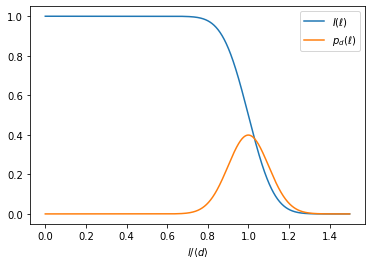

In [18]:
plt.plot(lrangeNorm, I(lrange, davg, sigma, alpha), label=r'$I(\ell)$')
plt.plot(lrangeNorm, Pd.pdf(lrange), label=r'$p_d(\ell)$')
plt.legend()
plt.xlabel(r"$l/\langle d\rangle$");

# Solutions for the request / capacity Eq.

[1.      0.03593]


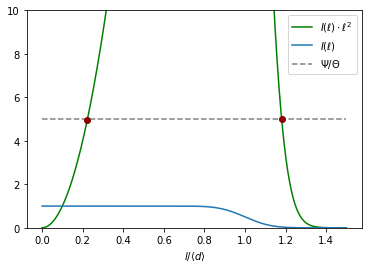

In [19]:
f = I(lrange, davg, sigma, alpha)
g = lrange**2*I(lrange, davg, sigma, alpha)

plt.plot(lrangeNorm, g, label=r'$I(\ell)\cdot \ell^2$', c="green");
plt.plot(lrangeNorm, f, label=r'$I(\ell)$');


plt.hlines(Psi/Theta, lrangeNorm[0], lrangeNorm[-1], ls="--", color="gray", label=r"$\Psi/\Theta$");

plt.xlabel(r"$l/\langle d\rangle$")
plt.ylim([0, 2*Psi/Theta])
#plt.yscale("log")
plt.legend();

PT = Psi/Theta * np.ones(len(lrangeNorm))

idx = np.argwhere(np.diff(np.sign(g-PT))).flatten()
print(np.around(f[idx], decimals = 5))
plt.plot(lrangeNorm[idx], g[idx], 'o', color="darkred");

# Scaling of peak height with $\langle d \rangle$

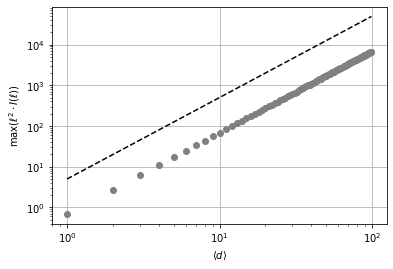

In [15]:
D = np.arange(1, 100, 1)

for davg in D:
    
    sigma = 0.1*davg
    lrange = np.arange(0.0*davg, 1.5*davg, 0.01)
    lrangeNorm = lrange / davg;
    
    #f = IPrime(lrange, davg, sigma, alpha)*lrange+2*I(lrange, davg, sigma, alpha)
    l2I = lrange**2*I(lrange, davg, sigma, alpha)
    
    M = np.max(l2I)

    plt.plot(davg, M, "o", c="gray")
    #plt.plot(lrangeNorm, f,
             #label=r'$I(\ell)\cdot \ell^2$');
    #idx = np.argwhere(np.diff(np.sign(f))).flatten()
    #print(l2I[idx], M)
    #print(M)
    
plt.plot(D, 5*D**2, "--", c="black")

plt.grid();

plt.ylabel(r"$\max(\ell^2\cdot I(\ell))$");
plt.xlabel(r"$\langle d\rangle$");

plt.xscale("log")
plt.yscale("log")

#plt.ylim([-.2, .2])

# Heat map for $I$

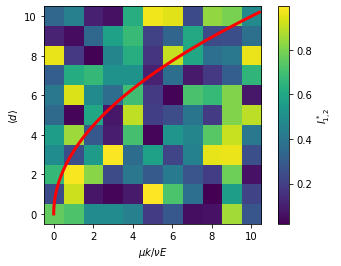

In [8]:
#import numpy as np
import seaborn as sns
#import matplotlib.pylab as plt

fig=plt.figure()
#fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

X = np.arange(0, 10.3, 0.1)
uniform_data = np.random.rand(11, 11)
cs = ax.imshow(uniform_data, zorder=0, origin="lower")
ax.plot(0.1*X*X, X, lw=3, zorder=1, c="r")
ax.set_xlabel(r"$\mu k / \nu E$");
ax.set_ylabel(r"$\langle d \rangle$");
cbar = fig.colorbar(cs, label=r"$I^*_{1,2}$")
